![](http://i.imgur.com/hkZ7WPE.jpg)

<ul>
    <li><h4>Import libraries</h4></li>
</ul>

In [10]:
!pip install pycountry
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pycountry
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [11]:
!pip install twython
nltk.download('vader_lexicon')


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manishghoshal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<ul>
    <li><h4>Load data</h4></li>
</ul>

In [12]:
df = pd.read_csv('/Users/manishghoshal/Downloads/omicron.csv')

df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


<ul>
    <li><h4>Concise summary of the data</h4></li>
</ul>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17046 entries, 0 to 17045
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17046 non-null  int64 
 1   user_name         17046 non-null  object
 2   user_location     13433 non-null  object
 3   user_description  15716 non-null  object
 4   user_created      17046 non-null  object
 5   user_followers    17046 non-null  int64 
 6   user_friends      17046 non-null  int64 
 7   user_favourites   17046 non-null  int64 
 8   user_verified     17046 non-null  bool  
 9   date              17046 non-null  object
 10  text              17046 non-null  object
 11  hashtags          10219 non-null  object
 12  source            17046 non-null  object
 13  retweets          17046 non-null  int64 
 14  favorites         17046 non-null  int64 
 15  is_retweet        17046 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.9+ MB


<ul>
    <li><h4>Shape of the data</h4></li>
</ul>

In [14]:
df.shape

(17046, 16)

<p style="font-size:115%">Dataset has <strong>60168</strong> rows and <strong>16</strong> columns.</p>

<ul>
    <li><h4>Text column</h4></li>
</ul>

In [15]:
df['text'][:10].tolist()

['Daily US Confirmed Covid Cases by County For ME   2022-02-08:  Covid Insights From Our Analytics Team and USAFacts… https://t.co/j7UBiKk3Em',
 '@Yascha_Mounk #CDC says number of fully #vaccinated #Omicron patients in #hospital rose from 25% to 40%:\nhttps://t.co/QeU3ZINCuC',
 'Daily US Confirmed Covid Cases by County For LA   2022-02-08:  Covid Insights From Our Analytics Team and USAFacts… https://t.co/gFxuSt6zn9',
 'Daily US Confirmed Covid Cases by County For LA   2022-02-08:  Covid Insights From Our Analytics Team and USAFacts… https://t.co/RCu5jSFmc5',
 'With the #Beijing2022 #WinterOlympics already underway U.S. #olympians are looking to travel #security firms to pro… https://t.co/h4EuqkK2Np',
 'Doctor Who Helped Discover #Omicron Says She Was Pressured Not to Reveal It’s Mild https://t.co/6XnjUU5R21 via @epochtimes',
 'Someone used the term “Corona” to refer to the virus today; haven’t heard that term in about 18 months. Weird. #coronavirus #covid #omicron',
 'Daily US Confirm

<p style="font-size:115%">Text needs to be preprocessed, which will be taken care later</p>

<ul>
    <li><h4>Tweets per hour</h4></li>
</ul>

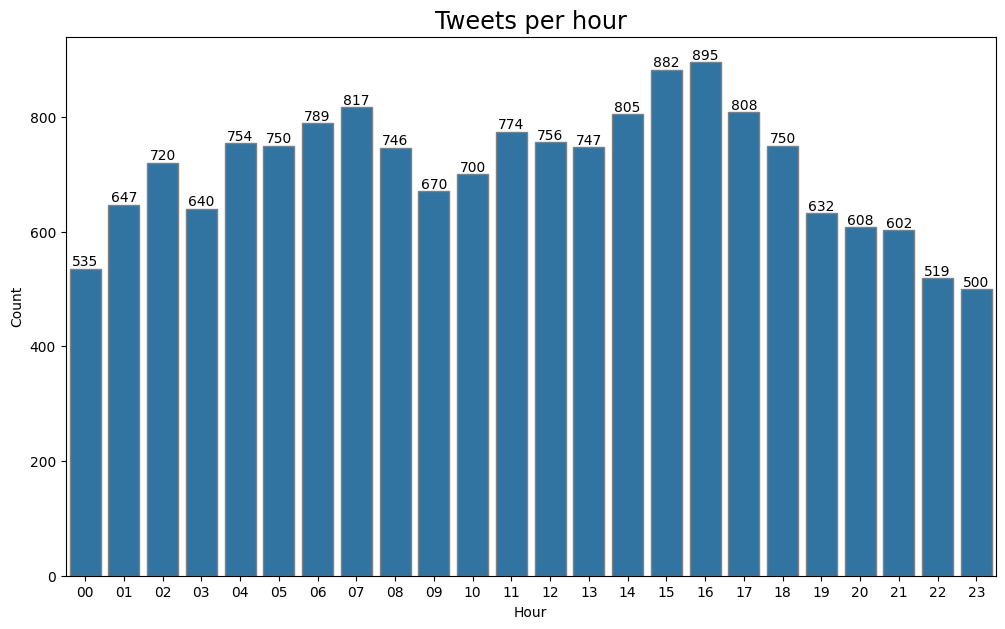

In [16]:
df['date']=pd.to_datetime(df['date'])

# tweets per hour
tweets_per_hr = df['date'].dt.strftime('%H').value_counts().sort_index().to_frame(name='Count')
tweets_per_hr['Hour']=tweets_per_hr.index


plt.figure(figsize=(12,7))
ax=sns.barplot(x='Hour', y='Count',data=tweets_per_hr, edgecolor='grey')
ax.bar_label(ax.containers[0])
plt.title('Tweets per hour', size='xx-large')
plt.show()

<ul>
    <li><h4>User locations</h4></li>
</ul>

In [17]:
df['user_location'].value_counts()[:10]

user_location
Los Angeles, CA                 2658
India                            474
USA                              325
In Your Mind Now                 211
Chandigarh                       210
United States                    180
Canada                           180
New York City, New York, USA     156
Hong Kong                        122
New Delhi, India                 106
Name: count, dtype: int64

<p style="font-size:115%">We will have to extract country names from the user location</p>

In [18]:
location = [loc for loc in df['user_location'] if type(loc)==str]

country_name = [country.name for loc in location for country in pycountry.countries if country.name in loc]
country_name[:5]

['United States', 'Mexico', 'United States', 'United States', 'Germany']

/var/folders/bb/m07q6d895630lsmj_4sxhdth0000gn/T/ipykernel_3167/3522560886.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='Tweets Count',data=country_df, palette='Blues_r', edgecolor='grey');


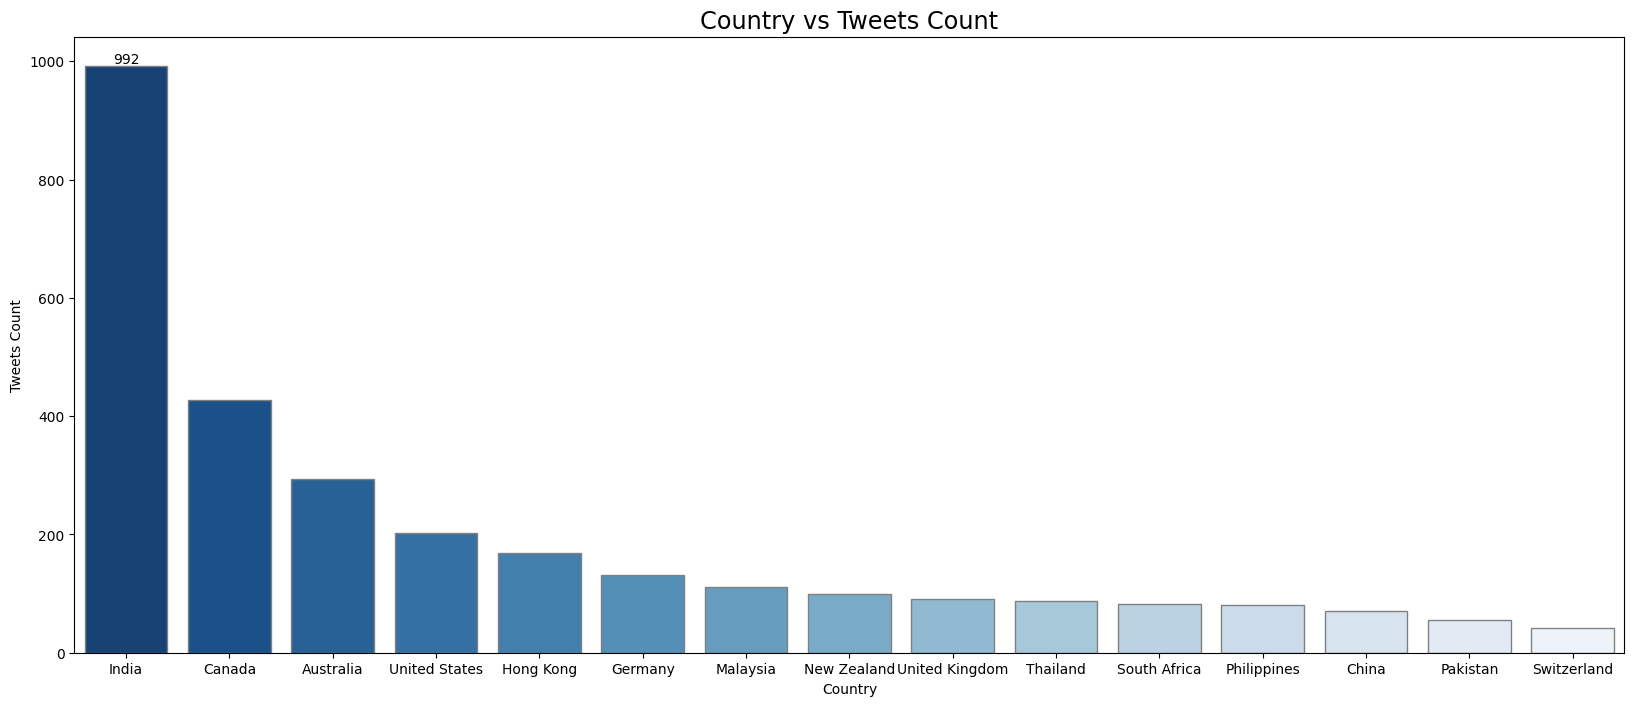

In [19]:
# dictionary to count number of occurances of each country
count={}
for country in country_name:
    count[country] = count.get(country, 0) + 1

# Country vs tweets count
country_df = pd.DataFrame({'Country': list(count.keys()),'Tweets Count': list(count.values())})
country_df = country_df.sort_values(by = 'Tweets Count', ascending=False)
country_df=country_df[:15] # top 15 countries

plt.figure(figsize=(20,8))
plt.title('Country vs Tweets Count', size='xx-large')
ax = sns.barplot(x='Country', y='Tweets Count',data=country_df, palette='Blues_r', edgecolor='grey');
ax.bar_label(ax.containers[0])
plt.show()

<p style="font-size:115%">Most of the tweets are from <strong>India</strong></p>

<h1 style="color:#189AB4;"><strong>Text Preprocessing</strong></h1>

<p style="font-size:115%">Now, we clean then text using a user defined function.</p>

In [20]:
def preprocess(text):
    

    text = text.replace('\n', ' ')
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', '',text)
    text = re.sub('@[\w]+', '',text)
    punc ='''.?!,:;-_—[](){}'"`~|\/@#$%^&+=*'''
    for i in text:
        if i in punc:
            text = text.replace(i, '') 
    
    re.sub("\s\s+", " ", text)
    
    text = text.strip().lower()
    
    # lemmatization
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    
    # stopword removal
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)

    # replace covid19 with covid
    text=text.replace('covid19','covid')
    
    return text


# remove promotional tweets (with words 'subscribe' and 'subscription')
def no_spam(text):
    if 'subscri' in text:
        text=''
    return text

In [21]:
# apply functions
df['text']= df['text'].apply(preprocess)
df['text']= df['text'].apply(no_spam)

<p style="font-size:115%">In sentiment analysis use case, we need not remove the emojis or emoticons as it will convey some important information about the sentiment. Here we will remove all the non ascii characters except some common emojis</p>

In [22]:
def demoji(text):
    
    # frequent emojis whhich will be kept
    pattern = '😤|😡|😠|😑|🙄|🤨|😶|😱|🙀|😲|😓|😰|😢|😥|😭|😪|🤕|😔|😣|🙁|😒|😖|😕|🥴|🤒|☹️|😞|😷|🤧|😧|😨|😩|🥺|😦|😆|😀|🤭|🤩|😌|🥰|😁|😘|😂|😅|😊|😝|😙|😇'
    for word in text:    
        if re.match(pattern, word):
            continue
            
        # remove all other non ascii characters
        text=text.replace(word, re.sub('[^\x00-\x7f]','', word)).strip()
        
    return text

# apply function
df['text']= df['text'].apply(demoji)

<p style='font-size:115%'>Now we replace the emojis with their meaning</p>

In [23]:
def convert(text):
    
    # dictionary of emoji with their meaning
    d = {'😤':'frustrated','😡':'angry','😠':'angry','😱':'horrified','🙀':'shock','😲':'shock','🙄':'disapproval',
         '🤨':'suspicion','😶':'disappointment','😓':'sad','😰':'sad','😢':'sad','😥':'sad','😭':'sad','😪':'sad',
         '🤕':'sad','😔':'sad','😣':'sad','🙁':'sad','😒':'sad','😖':'sad','😕':'sad','🥴':'sad','🤒':'sad','☹️':'sad',
         '😞':'sad','😷':'sick','🤧':'sick','😧':'sad','😨':'sad','😩':'sad','🥺':'sad','😦':'sad','😫':'sad',
         '😆':'happy','😀':'smile','🤭':'embarrassment','🤩':'exciting','🥰':'affection','😁':'smile','😂':'laugh',
         '😅':'nervousness','😊':'smile','😝':'fun','😙':'affection','😇':'blessed'}
    
    for emoji, sentiment in d.items():
        text=text.replace(emoji, sentiment)
    return text


df['senti_text']= df['text'].apply(convert)

<ul>
    <li><h4>Word Cloud</h4></li>
</ul>

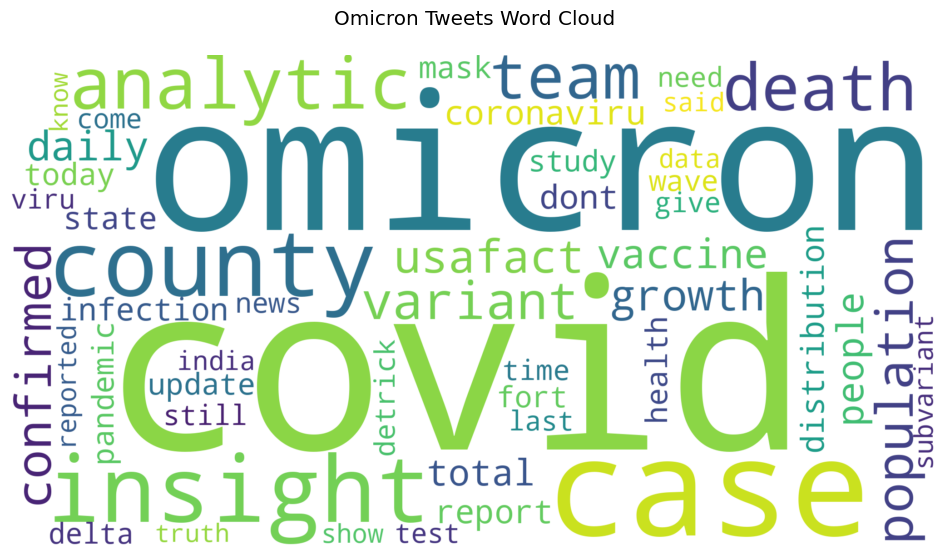

In [24]:
# creating the text variable
text = " ".join(tweet for tweet in df.text)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=STOPWORDS, min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Omicron Tweets Word Cloud\n', size='x-large')
plt.savefig('./omicron_wordcloud.jpg',dpi=720) # saving the image
plt.show()

<ul>
    <li><h4>Number of words in text</h4></li>
</ul>

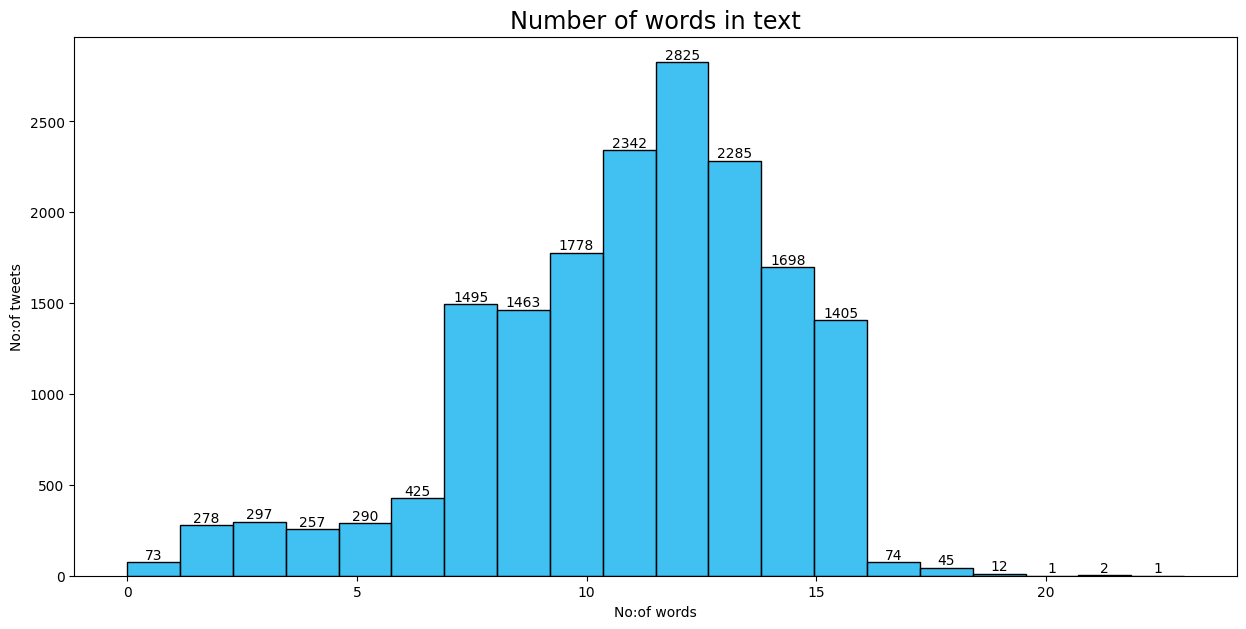

In [25]:
# word count
word_count = [len(text.split()) for text in df.text]
df['word_count'] = word_count


plt.figure(figsize=(15,7))
ax=sns.histplot(x='word_count', data=df, bins=20, color='#00acee')
ax.bar_label(ax.containers[0])
plt.title('Number of words in text',size='xx-large')
plt.xlabel('No:of words')
plt.ylabel('No:of tweets')
plt.show()

<p style="font-size:115%">We will exclude some tweets</p>


In [26]:
# excluding text with less than 3 words
df=df[df['word_count']>2]

# excluding tweets with more than 16 words
df=df[df['word_count']<17]

<h1 style="color:#189AB4;"><strong>Sentiment Analysis</strong></h1>

<p style="font-size:115%"><strong>Sentiment analysis</strong> is the computational task of automatically determining what feelings a writer is expressing in text. <strong>Sentiment</strong> is often framed as a binary distinction (positive vs. negative), but it can also be a more fine-grained, like identifying the specific emotion an author is expressing (like fear, joy or anger).</p>

<p style="font-size:115%">Sentiment analysis is used for many applications, especially in business intelligence. Some examples of applications for sentiment analysis include:
<ul>
    <li><p style="font-size:115%">Analyzing the social media discussion around a certain topic</p></li>
    <li><p style="font-size:115%">Evaluating survey responses</p></li>
    <li><p style="font-size:115%">Determining whether product reviews are positive or negative</p></li>
</ul>    
</p>
<p style="font-size:115%">Sentiment analysis is not perfect, and as with any automatic analysis of language, you will have errors in your results. It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze all of it.</p>

<p style="font-size:115%"><strong>Valence Aware Dictionary for sEntiment Reasoning</strong>, (or VADER), is a NLP algorithm that blended a sentiment lexicon approach as well as grammatical rules and syntactical conventions for expressing sentiment polarity and intensity. Vader is an open-sourced package within the Natural Language Toolkit (NLTK). <strong>NLTK.Vader</strong> is one of the more popular tools for sentiment analysis.</p>

<ul>
    <li><h4>Overall Sentiment</h4></li>
</ul>

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

df["Positive"] = [SIA.polarity_scores(i)["pos"] for i in df["senti_text"]]
df["Neutral"] = [SIA.polarity_scores(j)["neu"] for j in df["senti_text"]]
df["Negative"] = [SIA.polarity_scores(k)["neg"] for k in df["senti_text"]]

df1 = df[["text", "Positive","Neutral", "Negative"]]
df1.head()

,text,Positive,Neutral,Negative
0,daily u confirmed covid case county 20220208...,0.000,1.000,0.0
1,cdc say number fully vaccinated omicron patien...,0.115,0.885,0.0
2,daily u confirmed covid case county la 20220...,0.000,1.000,0.0
3,daily u confirmed covid case county la 20220...,0.000,1.000,0.0
4,beijing2022 winterolympics already underway u ...,0.211,0.789,0.0


In [28]:
# sums of sentiment scores
pos = sum(df1["Positive"])
neu = sum(df1["Neutral"])
neg = sum(df1["Negative"])

# calculates sentiment score
def sentiment_score(pos, neu, neg):
    if (pos>neu) and (pos>neg):
        print("Positive :)")
    elif (neu>pos) and (neu>neg):
        print("Neutral :|")
    else:
        print("Negative :(")
        
sentiment_score(pos, neu, neg)

Neutral :|


<p style="font-size:115%">So most of the opinions were <strong>neutral</strong>, which means that people were <strong>sharing information</strong> about the Omicron variant instead of sharing any positive or negative opinions.</p>

In [29]:
# counting positive, neutral and negative tweets

sentiments_nltk = []

for tweet in df.senti_text:
    sentiment_dict = SIA.polarity_scores(tweet)
    sentiment_dict.pop('compound', None)
    sentiments_nltk.append(max(sentiment_dict , key=sentiment_dict.get))
    
df['sentiment_nltk'] = sentiments_nltk
df['sentiment_nltk'].value_counts()

sentiment_nltk
neu    15715
pos      457
neg      388
Name: count, dtype: int64

<ul>
    <li><h4>Word Cloud for Positive Tweets</h4></li>
</ul>

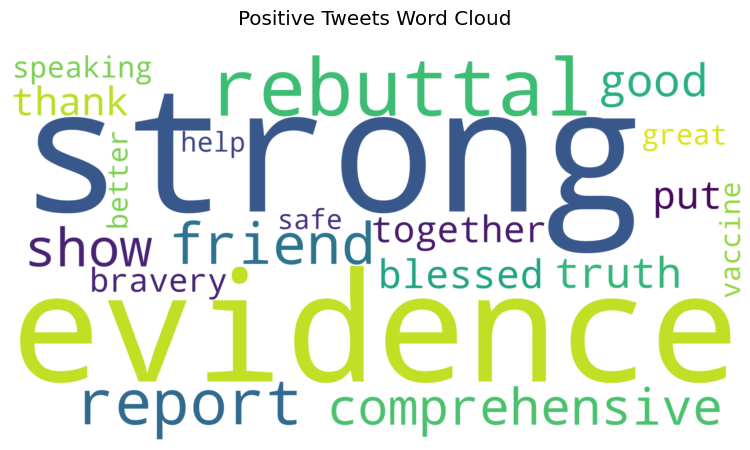

In [30]:
pos_tweets = " ".join(sentiment for sentiment in df[df['sentiment_nltk']=='pos']['text'])

# Creating word cloud of positive tweets
stopwords_p = STOPWORDS
stopwords_p.update(('omicron','covid', 'u','ha','amp','one','people','variant','mask'))
word_cloud1 = WordCloud(collocations=False, background_color='white',
                       max_words=20, stopwords=stopwords_p, #min_word_length=4,
                       width=2048, height=1080).generate(pos_tweets)

# Display the generated Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Tweets Word Cloud\n', size='x-large')
plt.savefig('./wc_positive.jpg',dpi=720)

plt.show()

<ul>
    <li><h4>Word Cloud for Negative Tweets</h4></li>
</ul>

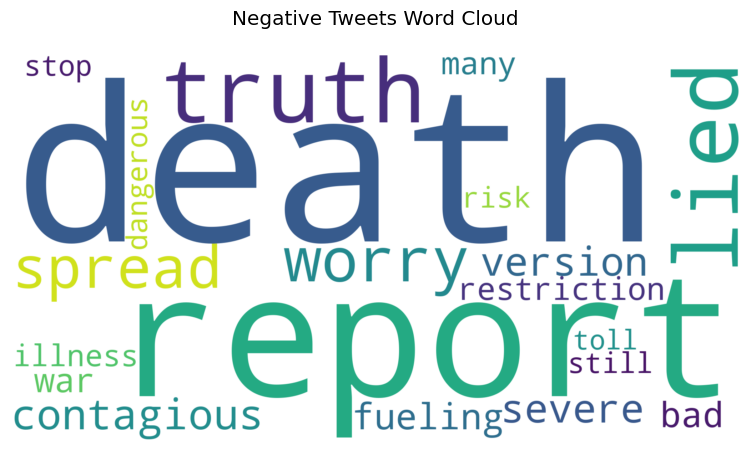

In [31]:
neg_tweets = " ".join(sentiment for sentiment in df[df['sentiment_nltk']=='neg']['text'])

# Creating word cloud of positive tweets
stopwords_n = STOPWORDS
stopwords_n.update(('vaccine','news','im','time','world','travel')) # 
word_cloud2 = WordCloud(collocations=False, background_color='white',
                       max_words=20, stopwords=stopwords_n,
                       width=2048, height=1080).generate(neg_tweets)

# Display the generated Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Tweets Word Cloud\n', size='x-large')
plt.savefig('./wc_negative.jpg',dpi=720)
plt.show()